## Asif Mursalin
## 60100148

# Dowloanding and setting up

In [1]:
import nltk
from nltk.corpus import reuters, stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
nltk.download('reuters')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Step 1: Load the Reuters Corpus
Extract sentences from the Reuters corpus Explanation: The Reuters corpus contains a
collection of Fnancial news articles. Each sentence will be tokenized into words to create the
vocabulary for Word2Vec

In [3]:
corpus_sentences = []
for fileid in reuters.fileids():
  raw_text = reuters.raw(fileid)
  tokenized_sentence = [word for word in nltk.word_tokenize(raw_text) if word.isalnum() and word]
  corpus_sentences.append(tokenized_sentence)
print(f"Number of sentences in the Reuters corpus: {len(corpus_sentences)}")

Number of sentences in the Reuters corpus: 10788


# Step 2: Train a Word2Vec Model
Explanation: Word2Vec will learn vector representations for each word in the vocabulary.
Parameters:
- vector_size: Size of the word embedding vectors.
- window: Context window size for training.
- min_count: Minimum frequency for a word to be included in the vocabulary.
- workers: Number of threads for parallel processing

In [4]:
model = Word2Vec(sentences=corpus_sentences, vector_size=100, window=5, min_count=5, workers=4)
# Print vocabulary size
print(f"Vocabulary size: {len(model.wv.index_to_key)}")

Vocabulary size: 12945


# Step 3: Extract Word Embeddings for Visualization

In [5]:
import numpy as np
# Extract the learned word vectors and their corresponding words for visualization.
words = list(model.wv.index_to_key)[:200] # Limit to top 200 words for better visualization
word_vectors = np.array([model.wv[word] for word in words])

# Step 4: Reduce Dimensionality with t-SNE

In [6]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Step 5: Visualize the Word Embeddings

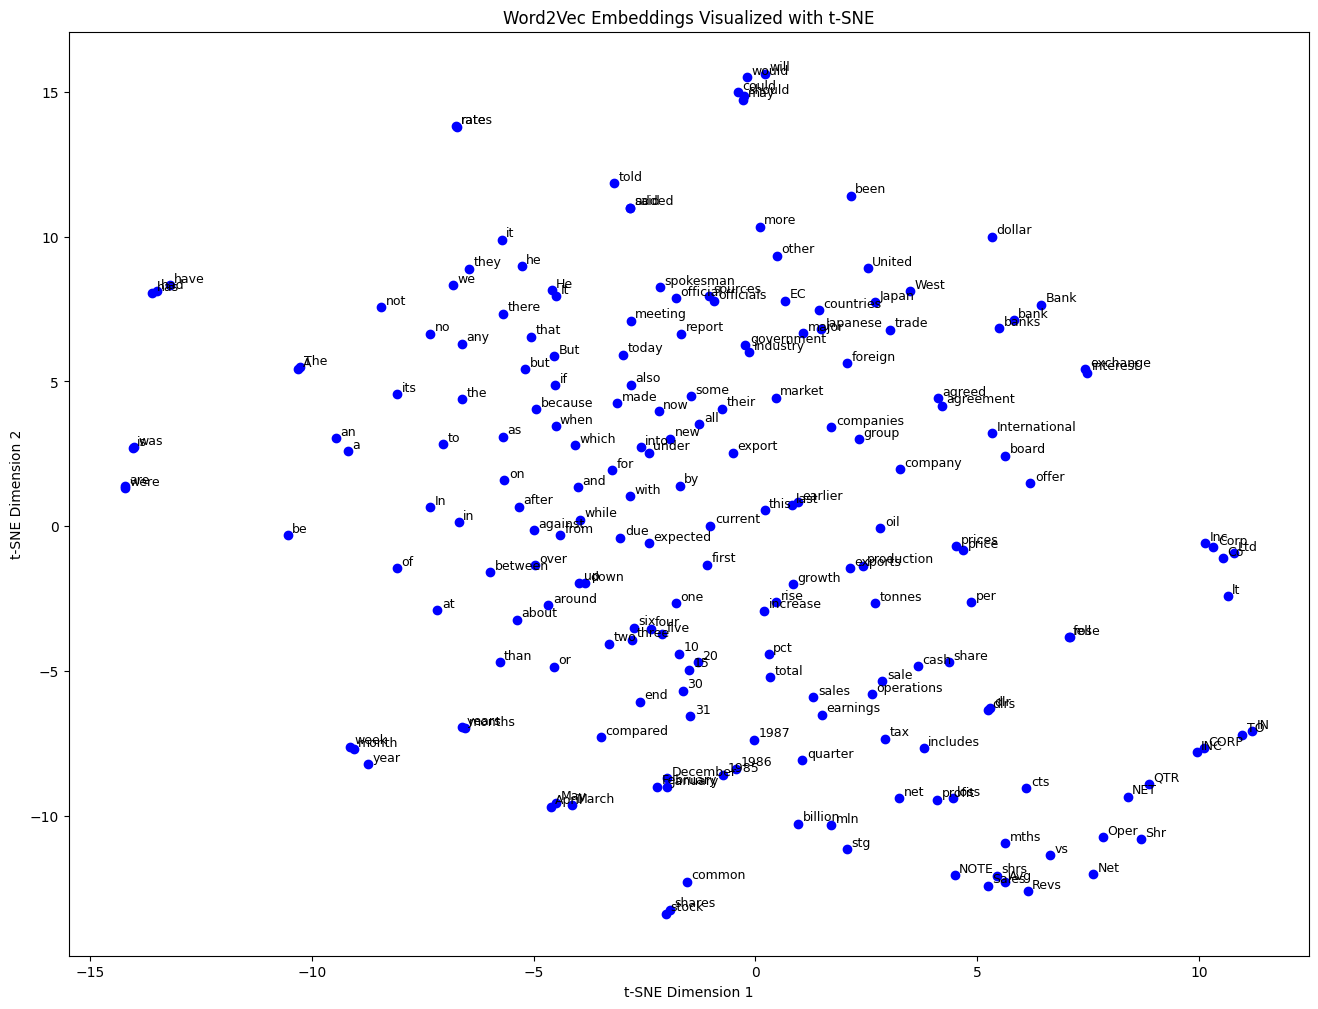

In [7]:
def plot_embeddings(vectors, labels):
  plt.figure(figsize=(16, 12))
  for i, label in enumerate(labels):
    x, y = vectors[i]
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.1, y + 0.1, label, fontsize=9)
  plt.title("Word2Vec Embeddings Visualized with t-SNE")
  plt.xlabel("t-SNE Dimension 1")
  plt.ylabel("t-SNE Dimension 2")
  plt.show()
plot_embeddings(word_vectors_2d, words)

Key Questions for Students:
- What do you observe about the clusters in the t-SNE plot?

 Numbers and measurement words like "billion," "tonnes," "pct" (percent), "stg" appear near each other .


- How do you think the choice of parameters (e.g., window size, vector size) affects the
embeddings?

 Window Size
  - A larger window would capture broader context but might miss fine-grained relationships
  - A smaller window would focus on immediate neighbors but might miss broader thematic connections

- What are the limitations of using Word2Vec and t-SNE for NLP tasks?




Word2Vec Limitations:

- Cannot handle polysemy (same word with multiple meanings)
- Loses word order information
- Requires large amounts of training data for rare words
- Static embeddings don't capture context-dependent meanings


t-SNE Limitations:

- Only shows relative distances, not absolute relationships
- Stochastic nature means visualizations can vary between runs
- Information loss in dimensionality reduction from 100D to 2D
- Can sometimes create artificial clusters or break true clusters due to local optimization

# Information Retreival Task

Task: Build a Document Retrieval System using Word2Vec
1. Given a query string "stock market", and the most relevant documents from the Reuters corpus using
Word2Vec embeddings.
2. Steps:
a. Preprocess the query string by tokenizing and removing stop words.
b. Compute the average Word2Vec embedding for the query string.
c. Compute the average Word2Vec embedding for each document in the Reuters corpus.
d. Use cosine similarity to �nd the top N most relevant documents for the query.
3. Display the top N document IDs and their similarity score

In [13]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

def get_document_embedding(tokens, word2vec_model):
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])

    if not embeddings:
        return np.zeros(word2vec_model.vector_size)

    return np.mean(embeddings, axis=0)

def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    if norm_a == 0 or norm_b == 0:
        return 0

    return dot_product / (norm_a * norm_b)

def retrieve_documents(query, model, corpus_sentences, top_n=5):
    query_tokens = preprocess_text(query)
    query_embedding = get_document_embedding(query_tokens, model)
    similarities = []

    for i, doc_tokens in enumerate(corpus_sentences):
        doc_embedding = get_document_embedding(doc_tokens, model)
        similarity = cosine_similarity(query_embedding, doc_embedding)
        similarities.append((i, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

query = "stock market"
top_results = retrieve_documents(query, model, corpus_sentences)

print(f"\nTop {len(top_results)} most relevant documents for query '{query}':")
for doc_id, similarity in top_results:
    doc_text = ' '.join(corpus_sentences[doc_id][:10]) + '...'
    print(f"\nDocument ID: {doc_id}")
    print(f"Similarity Score: {similarity:.4f}")
    print(f"Document Preview: {doc_text}")


Top 5 most relevant documents for query 'stock market':

Document ID: 8461
Similarity Score: 0.7248
Document Preview: ICCO delegates accept principles of buffer stock compromise as negotiation...

Document ID: 1959
Similarity Score: 0.7157
Document Preview: ICCO buffer stock manager to buy tonnes cocoa Monday June...

Document ID: 1551
Similarity Score: 0.7122
Document Preview: ICCO buffer stock manager to buy tonnes cocoa Wednesday June...

Document ID: 3319
Similarity Score: 0.7110
Document Preview: Cocoa Council agrees new buffer stock rules delegates Cocoa Council...

Document ID: 1346
Similarity Score: 0.7081
Document Preview: ICCO buffer stock manager to buy tonnes cocoa Tuesday June...
